In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys
%matplotlib inline

In [9]:
#nx_number_of_points_in_x_direction


for different range of nx, how the 1D convection equation behaves!
Linear Convection

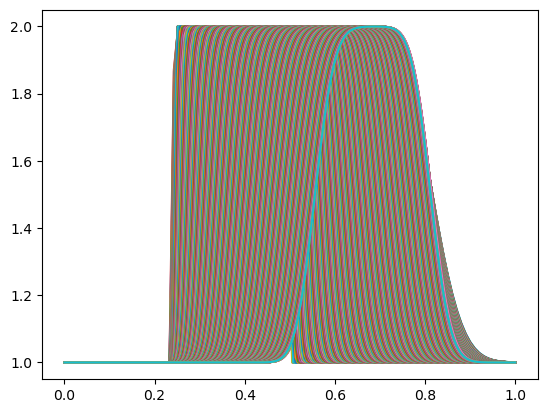

In [10]:
for nx in range (101,201):
    dx = 2 / (nx-1) #distance_between_points
    nt = 250 #number_of_time_steps
    dt = .0025 #amount_of_time_each_step_covered
    c = 1 #assume wavespeed of c = 1
    u = np.ones(nx) #a numpy array with nx elements all equal to 1.
    u[int(0.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
    
    un = np.ones(nx) #initialize a temporary array
    for n in range (nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range (1, nx):  #iterate through the space
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        plt.plot(np.linspace(0, 1, nx), u);

    plt.plot(np.linspace(0, 1, nx), u);    
plt.show()

Now nonlinear convection

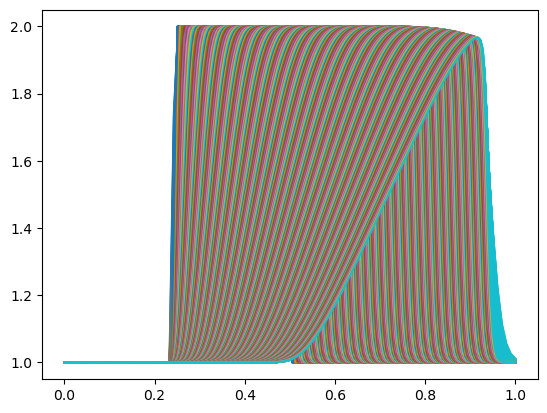

In [11]:
for nx in range (101,201):
    dx = 2 / (nx-1) #distance_between_points
    nt = 250 #number_of_time_steps
    dt = .0025 #amount_of_time_each_step_covered
    #c = 0.9 #assume wavespeed of c = 1
    u = np.ones(nx) #a numpy array with nx elements all equal to 1.
    u[int(0.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
    #plt.plot(np.linspace(0, 1, nx), u);
    un = np.ones(nx) #initialize a temporary array
    for n in range (nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range (1, nx):  #iterate through the space
            u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
        plt.plot(np.linspace(0, 1, nx), u);
    

plt.show()

How it moves through time

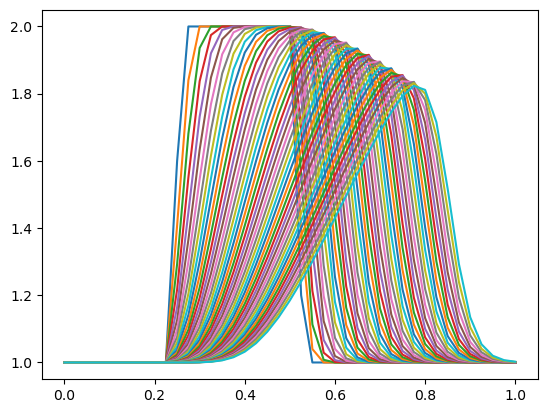

In [12]:
nx = 41
dx = 2 / (nx-1) #distance_between_points
nt = 50 #number_of_time_steps
dt = .01 #amount_of_time_each_step_covered
#c = 0.9 #assume wavespeed of c = 1
u = np.ones(nx) #a numpy array with nx elements all equal to 1.
u[int(0.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
#plt.plot(np.linspace(0, 1, nx), u);
un = np.ones(nx) #initialize a temporary array
for n in range (nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    for i in range (1, nx):  #iterate through the space
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    plt.plot(np.linspace(0, 1, nx), u);
    
plt.show()

Now the Diffusion Equation in 1D. Great Thing I finally know how this discretizations are working. 

u[n+1]x=u[n]+ν*Δt/Δx^2**(u[n+1]−2u[n]+u[n−1])

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys
%matplotlib inline

Below is the code provided by Dr. Barba.

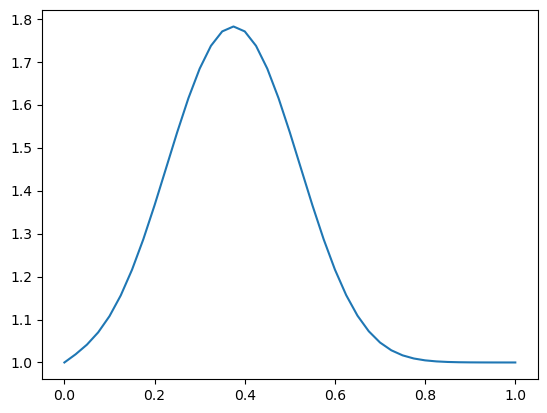

In [14]:
nx = 41
dx = 2 / (nx-1) #distance_between_points
nt = 50 #number_of_time_steps
nu = 0.3 #viscosity
sigma = .2 #I_dont_know_about_sigma_yet
dt = sigma * dx**2 / nu #amount_of_time_each_step_covered #a_little_confused_about_this_line
u = np.ones(nx) #a numpy array with nx elements all equal to 1.
u[int(0.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
#plt.plot(np.linspace(0, 1, nx), u);
un = np.ones(nx) #initialize a temporary array
for n in range (nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    for i in range (1, nx-1):  #iterate through the space, but_not_the_end_points
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
    
plt.plot(np.linspace(0, 1, nx), u);

The change is that I included the calculation as a function, so if to do in 2D or 3D, a function call would be enough. 

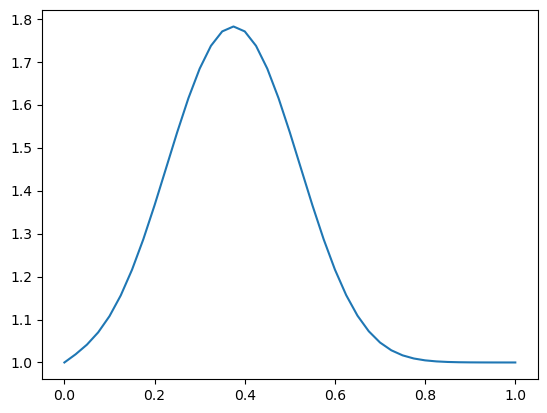

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys
%matplotlib inline

nx = 41
dx = 2 / (nx-1) #distance_between_points
nt = 50 #number_of_time_steps
nu = 0.3 #viscosity
sigma = .2 #I_dont_know_about_sigma_yet
dt = sigma * dx**2 / nu #amount_of_time_each_step_covered #a_little_confused_about_this_line
u = np.ones(nx) #a numpy array with nx elements all equal to 1.
u[int(0.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
#plt.plot(np.linspace(0, 1, nx), u);
un = np.ones(nx) #initialize a temporary array

def diffusion(a,an):
    for i in range (1, nx-1):  #iterate through the space, but_not_the_end_points
        a[i] = an[i] + nu * dt / dx**2 * (an[i+1] - 2 * an[i] + an[i-1])
    return [a]

for n in range (nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    diffusion(u,un)
    
plt.plot(np.linspace(0, 1, nx), u);

In [12]:
def cendiff(t,a,an):
    '''This Function iterates through space central difference scheme'''
    for n in range (t):
        a=an.copy()
        for i in range (1, nx-1):  #iterate through the space, but_not_the_end_points
            a[i] = an[i] + nu * dt / dx**2 * (an[i+1] - 2 * an[i] + an[i-1])
        return [a]

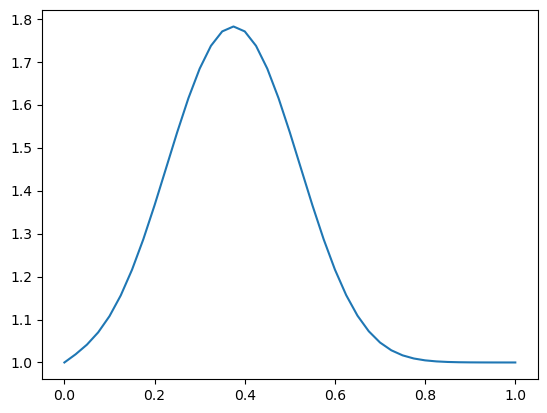

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys
%matplotlib inline

nx = 41
dx = 2 / (nx-1) #distance_between_points
nt = 50 #number_of_time_steps
nu = 0.3 #viscosity
sigma = .2 #I_dont_know_about_sigma_yet
dt = sigma * dx**2 / nu #amount_of_time_each_step_covered #a_little_confused_about_this_line
u = np.ones(nx) #a numpy array with nx elements all equal to 1.
u[int(0.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
#plt.plot(np.linspace(0, 1, nx), u);
un = np.ones(nx) #initialize a temporary array


cendiff(nt,u,un)


plt.plot(np.linspace(0, 1, nx), u2);
#plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys
%matplotlib inline

In [30]:
def oneDDiff(nx,nt,sigma,nu,vel):
    '''This is a function to solve 1D diffusion equation using central difference scheme'''
    
    dx = 2 / (nx-1) #distance_between_points
    dt = sigma * dx**2 / nu #amount_of_time_each_step_covered #a_little_confused_about_this_line
    u = np.ones(nx) #a numpy array with nx elements all equal to 1.
    u[int(0.5 / dx):int(1 / dx + 1)] = float(vel) #setting value of u between 0.5 and 1 as per our I.C.s
    un = np.ones(nx) #initialize a temporary array
    for n in range (nt):
        un=u.copy()
        for i in range (1, nx-1):  #iterate through the space, but_not_the_end_points
            u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
    
    return plt.plot(np.linspace(0, 1, nx), u);

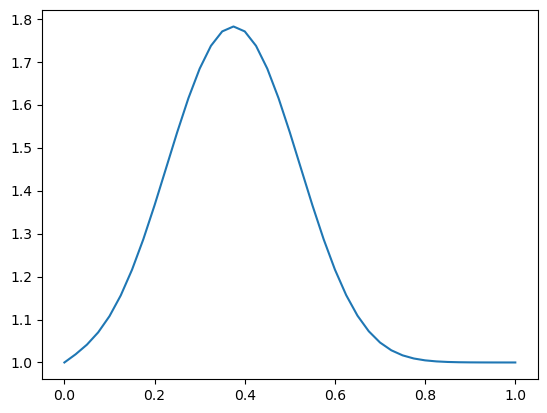

In [31]:
oneDDiff(41,50,.2,.3,2)
